<a href="https://colab.research.google.com/github/wajjuu/Budget-Allocation/blob/main/datavisbywajiha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question1: What is the correlation between features in the dataset. and what two features have very strong correlation with the independent variable? Justify with reason

Answer1: The correlation measures the strength of the linear relationship
between two quantitative variables. Correlation is a measure of the linear relationship between two variables or more. According to the rule of correlation coefficients, the strongest correlation is considered when the value is closest to +1 (positive correlation) or -1 (negative correlation). A positive correlation coefficient indicates that the value of one variable depends on the other variable directly. A zero-correlation coefficient indicates that there is no correlation between both variables. A negative correlation coefficient indicates that the value of one variable depends on the other variable inversely. The strongest correlation occurs when the slope is 1. This means that when one variable increases or decreases by one, the other variable also increases or decreases by the same amount. This line is at an of 45 degrees or 135 degrees angle.
For a correlation coefficient of zero, the points have no direction, the shape is almost round, and a line does not fit to the points on the graph. As the correlation coefficient increases, the observations group closer together in a linear shape. The line is difficult to detect when the relationship is weak, but becomes more clear as relationships become stronger


Question 2: Which feature has more outliers. Explain with a visualization.

Answer 2: A box-plot has more outliers.

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

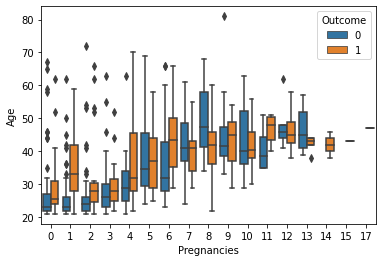

In [ ]:
sns.boxplot(x="Pregnancies",y="Age",data=df,hue="Outcome")

Question 3: In which Age group Majority of people have diabetes? Make a visualization to validate your finding.

Answer 3:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
a=pd.Series([])
for i in df.index:
    if(df.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(df.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(df.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(df.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
df['Age']=a
df.head()
#Find the number of diabetic person in each age group

data1=df[df['Outcome']==1].groupby('Age')[['Outcome']].count()
data1
data1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


,Outcome
Age,
21-24,31
25-30,59
31-40,76
41-55,85
>55,17


In [ ]:
# Percentage of diabetic Person in each age group

data2=df.groupby('Age')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1

,Outcome,Diabetic %
Age,,
21-24,31,14.155251
25-30,59,29.797980
31-40,76,48.407643
41-55,85,59.027778
>55,17,34.000000


It shows that 48% people are Diabetic in the age group of 31-40 and 59% people diabetic in the age group of 41-55.It depicts that the percentage of diabetic people in these age group is higher than the other age group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


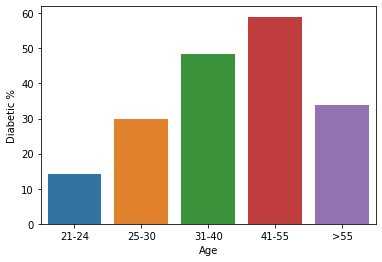

In [ ]:
sns.barplot(data1.index,data1['Diabetic %'])

The above data shows that people between the age of 31-55 are more likely to suffer from diabetes than people of other ages.